1. In this notebook we are trying to make the scatter plots for Depression Index(DI) vs Daylight Hours(DH). We are using a df that has been made in other notebooks using BRFSS and daylight data. They contain the z scores of both columns that we want to plot

In [1]:
#set up the libraries and our env
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
#look into our analysis df
PATH = 'data/'

df = pd.read_csv(PATH + 'analysis_2022.csv')
df.head()

,State,DH,DI,ADDEPEV3,MENTHLTH,DH_Z,DI_Z
0,AL,10.033333,0.000000,0.0,0.0,1.137661,-0.598581
1,AL,10.033333,0.000000,0.0,0.0,1.137661,-0.598581
2,AL,10.033333,0.444444,0.0,0.8,1.137661,-0.450494
3,AL,10.033333,0.000000,0.0,0.0,1.137661,-0.598581
4,AL,10.033333,0.000000,0.0,0.0,1.137661,-0.598581


Now we want to see what the data looks like before we plot it. This is to see where the majority of the data lies in number format.

In [3]:
df['DI_Z'].value_counts().head()

DI_Z
-0.598581    225219
 1.252514     19818
-0.499856     16966
 2.733390     15718
-0.351769     12349
Name: count, dtype: int64

In [4]:
df['DH'].value_counts().head()

DH
9.433333     25191
8.850000     25073
8.500000     24361
8.783333     21904
10.183333    17283
Name: count, dtype: int64

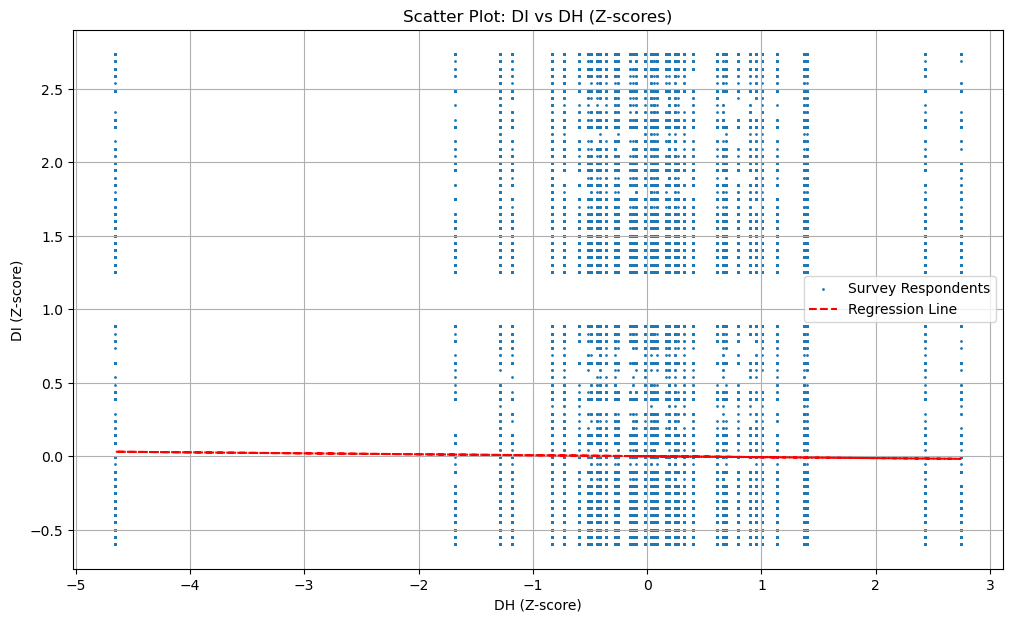

In [5]:
plt.figure(figsize=(12, 7))
#plot the scatterplot
m, b = np.polyfit(df['DH_Z'], df['DI_Z'], 1)  # Linear fit (y = mx + b)
regression_line = m * df['DH_Z'] + b

# Scatter plot
plt.scatter(df['DH_Z'], df['DI_Z'], s=1, label='Survey Respondents')  # Scatter plot
plt.plot(df['DH_Z'], regression_line, color='r', linestyle='--', label='Regression Line')  # Regression line

# Labels and title
plt.xlabel('DH (Z-score)')
plt.ylabel('DI (Z-score)')
plt.title('Scatter Plot: DI vs DH (Z-scores)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

 2. Since we see that there isn't that much to gather from the last graph other than the variables aren't related to each other. Lets try graphing the mean DI of each state vs the mean DH of each state (with z scores). I know that mean DH of each state should keep the value the same but we are doing it to keep consistency.

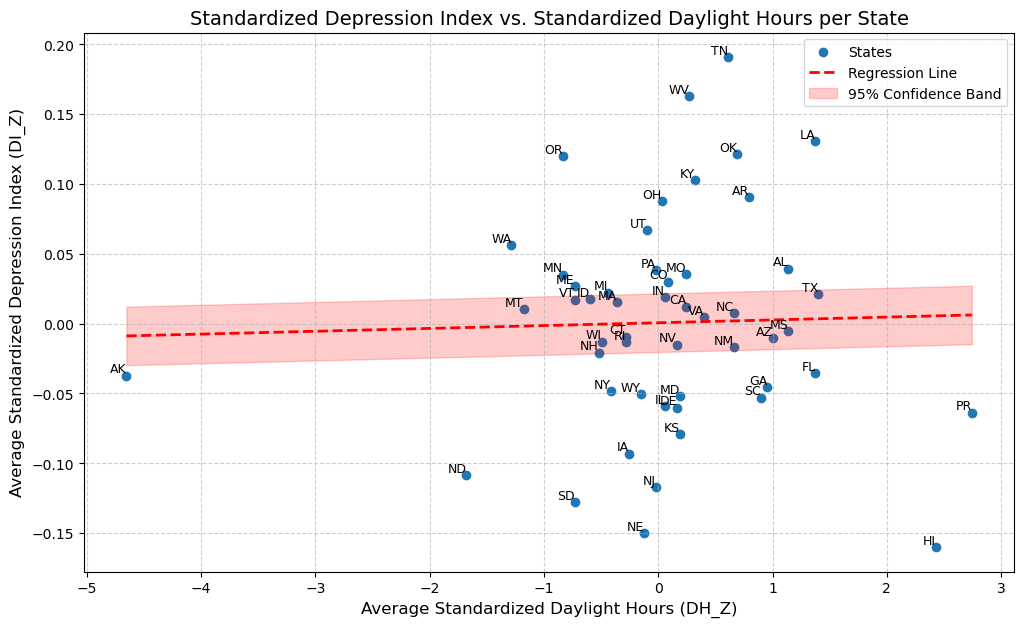

In [6]:
state_means = df.groupby("State").agg({"DI_Z": "mean", "DH_Z": "mean"}).reset_index()

# Extract X (DH_Z) and Y (DI_Z) values
x = state_means["DH_Z"]
y = state_means["DI_Z"]

# Compute the best-fit line (1st-degree polynomial)
slope, intercept = np.polyfit(x, y, 1)

# Generate a smooth range of x-values for full coverage
x_smooth = np.linspace(x.min(), x.max(), 100)
y_pred = slope * x_smooth + intercept

# Compute residuals and standard error
residuals = y - (slope * x + intercept)
SE = np.std(residuals) / np.sqrt(len(y))  # Standard Error of Estimate

# Compute upper and lower confidence bounds
y_upper = y_pred + 2 * SE  # 95% confidence interval (approx)
y_lower = y_pred - 2 * SE

# Create scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(x, y, label="States")

# Add labels for each state
for i, row in state_means.iterrows():
    plt.text(row["DH_Z"], row["DI_Z"], row["State"], fontsize=9, ha="right", va="bottom")

# Plot regression line
plt.plot(x_smooth, y_pred, color="red", linewidth=2, linestyle="--", label="Regression Line")

# Plot shaded confidence interval across the full range
plt.fill_between(x_smooth, y_lower, y_upper, color="red", alpha=0.2, label="95% Confidence Band")

# Add labels and title
plt.xlabel("Average Standardized Daylight Hours (DH_Z)", fontsize=12)
plt.ylabel("Average Standardized Depression Index (DI_Z)", fontsize=12)
plt.title("Standardized Depression Index vs. Standardized Daylight Hours per State", fontsize=14)
plt.legend()

# Show grid
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

From this graph above we can also see that the regression line is about the same as what it was before. However this graph helps us look at the each state individually and data is despersed by the survey takers.

3. Conclusion
We can see that there is not really a correlation between the DI_Z or DH_Z. We can see this in the Pearson values, the visualization, and the regression line There is also not a noticible difference between DI vs DH graph and the corresponding z-score graph.

## Record Dependencies

In [7]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-02-17T02:42:19.045593+00:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.17.2

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 6.5.0-1020-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

matplotlib: 3.7.1
scipy     : 1.10.1
pandas    : 2.0.2
numpy     : 1.24.3

